COVID Diagnosis

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

<font color='blue'>1. Image pre-processing</font>

In [15]:
targ_size=(64,64)
idg=ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.2,
    rotation_range=30,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
covid_data='C:/Users/hp/Desktop/MAC/ML/Assignment 2/xray_dataset_covid19'

generator_Train=idg.flow_from_directory(covid_data+'/train',target_size=targ_size,batch_size=32,class_mode='binary',color_mode='grayscale',shuffle=True)
generator_Test=idg.flow_from_directory(covid_data+'/test',target_size=targ_size,batch_size=32,class_mode='binary',color_mode='grayscale')


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


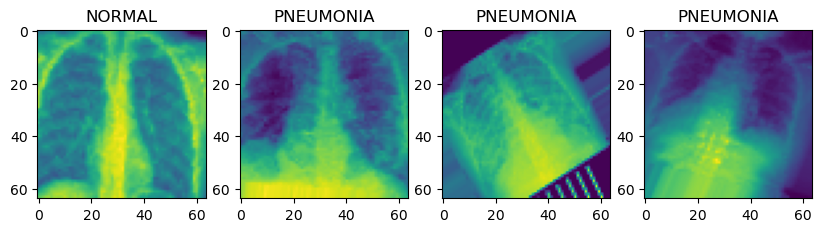

In [16]:
plot.figure(figsize=(10,10))
for i in range(1,5):
    plot.subplot(1,4,i)
    section=generator_Train.next()
    img=section[0][0]
    if section[1][0]==generator_Train.class_indices['PNEUMONIA']:
        plot.title('PNEUMONIA')
    else:
        plot.title('NORMAL')
    plot.imshow(img)
plot.show()

<font color='blue'>2. Model building</font>

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(generator_Train[0][0],to_categorical(generator_Train[0][1]),test_size=0.2,random_state=42)
print("x train shape:",xtrain.shape,"|| x test shape:",xtest.shape,"|| y train shape:",ytrain.shape,"|| y test shape:",ytest.shape)

x train shape: (25, 64, 64, 1) || x test shape: (7, 64, 64, 1) || y train shape: (25, 2) || y test shape: (7, 2)


In [71]:
model_Seq=Sequential()

model_Seq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_Seq.add(MaxPooling2D(pool_size=(2, 2)))
model_Seq.add(Conv2D(64, (3, 3), activation='relu'))
model_Seq.add(MaxPooling2D(pool_size=(2, 2)))
model_Seq.add(Conv2D(128, (3, 3), activation='relu'))
model_Seq.add(MaxPooling2D(pool_size=(2, 2)))
model_Seq.add(Conv2D(256, (3, 3), activation='relu'))
model_Seq.add(MaxPooling2D(pool_size=(2, 2)))
model_Seq.add(Flatten())

# model_Seq.add(Dropout(0.5))  # Adjust dropout rate based on experimentation
model_Seq.add(Dense(256, activation='relu'))
model_Seq.add(Dropout(0.5))  # Adjust dropout rate based on experimentation
model_Seq.add(Dense(1, activation='sigmoid'))
model_Seq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
stop_Early=EarlyStopping(monitor='val_loss',patience=3)


model_Seq.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 6, 6, 128)       

**To avoid overfitting, a drop out layer has been added. The model is not overfitted and works well with the given data.**

<font color='blue'>3. Model evaluation</font>

In [72]:
history=model_Seq.fit(generator_Train,epochs=20,validation_data=generator_Test,callbacks=[stop_Early])

Epoch 1/20
5/5 [==============================] - 5s 868ms/step - loss: 0.7224 - accuracy: 0.4730 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 4s 763ms/step - loss: 0.6907 - accuracy: 0.4730 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 4s 754ms/step - loss: 0.6905 - accuracy: 0.4730 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 4s 769ms/step - loss: 0.6841 - accuracy: 0.5676 - val_loss: 0.6817 - val_accuracy: 0.7000
Epoch 5/20
5/5 [==============================] - 4s 796ms/step - loss: 0.6865 - accuracy: 0.4932 - val_loss: 0.6712 - val_accuracy: 0.5750
Epoch 6/20
5/5 [==============================] - 4s 713ms/step - loss: 0.6847 - accuracy: 0.5878 - val_loss: 0.6630 - val_accuracy: 0.7000
Epoch 7/20
5/5 [==============================] - 4s 702ms/step - loss: 0.6613 - accuracy: 0.7230 - val_loss: 0.6418 - val_accuracy: 0.8750
Epoch 8/20
5/5 [====

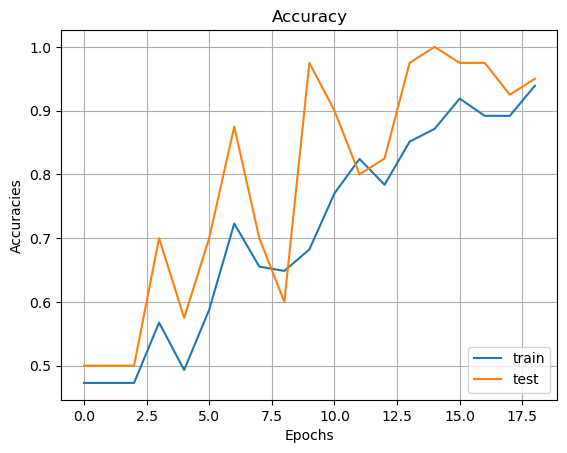

In [73]:

plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Accuracy')
plot.ylabel('Accuracies')
plot.xlabel('Epochs')
plot.legend(['train', 'test'], loc='lower right')
plot.grid()
plot.show()

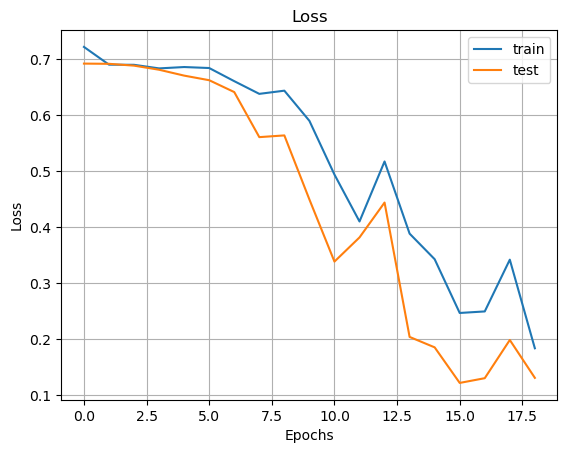

In [75]:
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Loss')
plot.ylabel('Loss')
plot.xlabel('Epochs')
plot.legend(['train', 'test'], loc='upper right')
plot.grid()
plot.show()